In [2]:
import random
import os

graph_configs = [
    (1000, 5000),
    (2000, 10000),
    (3000, 15000),
    (4000, 20000),
    (5000, 25000),
    (6000, 30000),
    (7000, 35000),
    (8000, 40000),
    (9000, 45000),
    (10000, 50000),
]

def generate_graph_txt_file(vertices, edges, filename):
    edge_set = set()
    with open(filename, 'w') as f:
        f.write(f"{vertices} {edges}\n")
        while len(edge_set) < edges:
            u = random.randint(0, vertices - 1)
            v = random.randint(0, vertices - 1)
            if u != v and (u, v) not in edge_set:
                w = random.randint(-10, 20)  # include negative weights
                edge_set.add((u, v))
                f.write(f"{u} {v} {w}\n")

# Create directory to store graphs
os.makedirs("bellman_graphs", exist_ok=True)

# Generate files
for v, e in graph_configs:
    filename = f"bellman_graphs/graph_{v}V_{e}E.txt"
    generate_graph_txt_file(v, e, filename)

print("Graph files generated in 'bellman_graphs' folder.")


Graph files generated in 'bellman_graphs' folder.


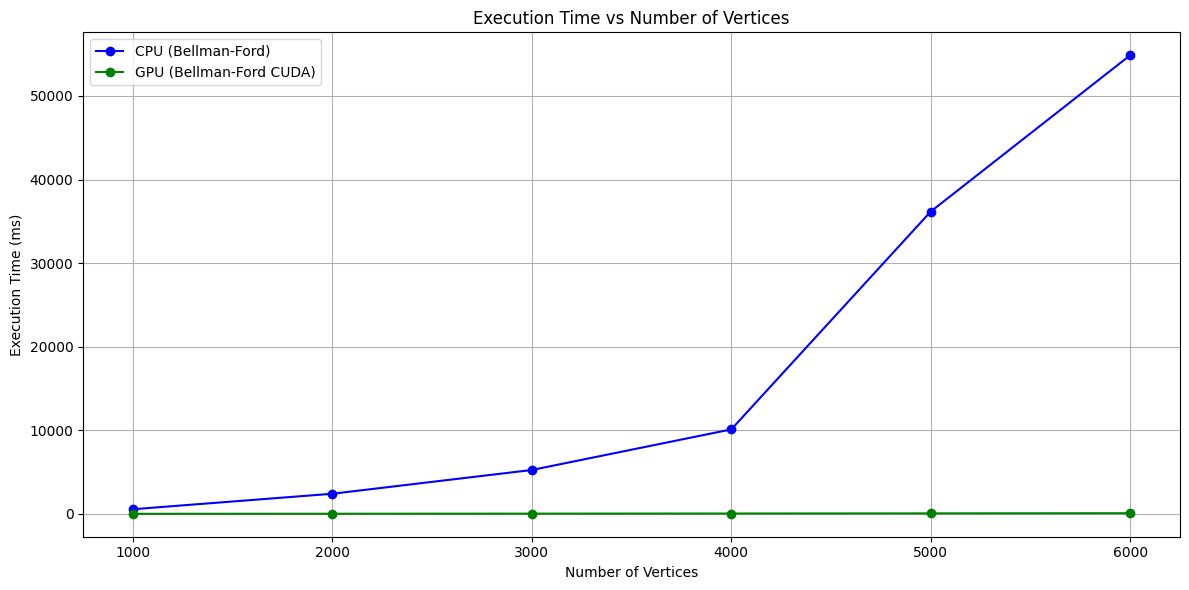

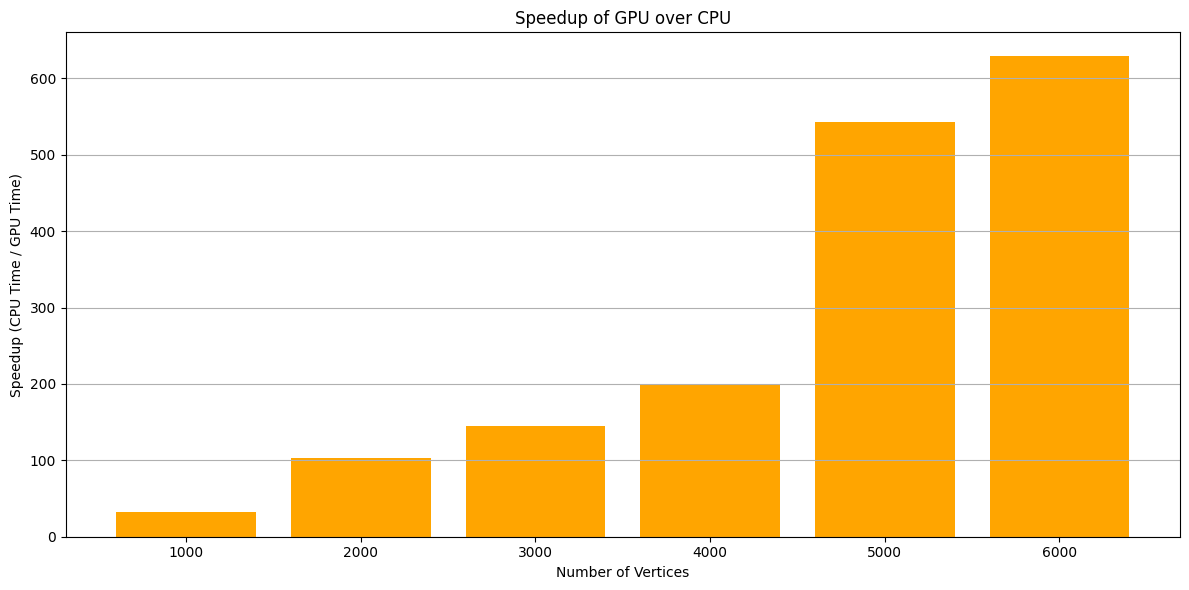

In [4]:
import matplotlib.pyplot as plt

# Data
vertices = [1000, 2000, 3000, 4000, 5000, 6000]
edges = [5000, 10000, 15000, 20000, 25000, 30000]
cpu_times = [564, 2416, 5258, 10114, 36170, 54869]  # in milliseconds
gpu_times = [17.288, 23.5864, 36.3456, 50.6104, 66.6214, 87.2612]  # in milliseconds
speedups = [cpu / gpu for cpu, gpu in zip(cpu_times, gpu_times)]

# Plot 1: Execution time comparison
plt.figure(figsize=(12, 6))
plt.plot(vertices, cpu_times, marker='o', label='CPU (Bellman-Ford)', color='blue')
plt.plot(vertices, gpu_times, marker='o', label='GPU (Bellman-Ford CUDA)', color='green')
plt.xlabel('Number of Vertices')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time vs Number of Vertices')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("/mnt/data/execution_time_comparison.png")

# Plot 2: Speedup
plt.figure(figsize=(12, 6))
plt.bar([str(v) for v in vertices], speedups, color='orange')
plt.xlabel('Number of Vertices')
plt.ylabel('Speedup (CPU Time / GPU Time)')
plt.title('Speedup of GPU over CPU')
plt.grid(True, axis='y')
plt.tight_layout()
# plt.savefig("/mnt/data/speedup_comparison.png")

# "/mnt/data/execution_time_comparison.png", "/mnt/data/speedup_comparison.png"


In [3]:
import random

def convert_signed_to_weighted(input_file, output_file, neg_range=(-10, -1), pos_range=(1, 10)):
    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    # First line gives the number of nodes and edges
    header = lines[0].strip()
    num_nodes, num_edges = map(int, header.split())
    
    weighted_edges = []

    for line in lines[1:]:
        parts = line.strip().split()
        if len(parts) != 3:
            continue  # Skip malformed lines
        u, v, sign = int(parts[0]), int(parts[1]), int(parts[2])
        
        weight = random.randint(*pos_range) if sign == 1 else random.randint(*neg_range)
        weighted_edges.append((u, v, weight))

    # Save to new file
    with open(output_file, 'w') as out:
        out.write(f"{num_nodes} {num_edges}\n")
        for u, v, w in weighted_edges:
            out.write(f"{u} {v} {w}\n")

    print(f"✅ Converted {input_file} to {output_file} with weights")

# Example usage:
convert_signed_to_weighted("Real_life.txt", "real_life_weighted.txt")


✅ Converted Real_life.txt to real_life_weighted.txt with weights
